Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

Loading dataset and display first 5 rows in dataset

In [ ]:
df = pd.read_csv('loan_data.csv')
df.head()

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,Male,Yes,4583,128000.0,N
1,Male,Yes,3000,66000.0,Y
2,Male,Yes,2583,120000.0,Y
3,Male,No,6000,141000.0,Y
4,Male,Yes,5417,267000.0,Y


Displaying last 5 rows in dataset

In [ ]:
 df.tail()

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
572,Female,No,2900,71000.0,Y
573,Male,Yes,4106,40000.0,Y
574,Male,Yes,8072,253000.0,Y
575,Male,Yes,7583,187000.0,Y
576,Female,No,4583,133000.0,N


To Display all rows and columns in Dataset

In [ ]:
df

,Gender,Married,ApplicantIncome,LoanAmount,Loan_Status
0,Male,Yes,4583,128000.0,N
1,Male,Yes,3000,66000.0,Y
2,Male,Yes,2583,120000.0,Y
3,Male,No,6000,141000.0,Y
4,Male,Yes,5417,267000.0,Y
...,...,...,...,...,...
572,Female,No,2900,71000.0,Y
573,Male,Yes,4106,40000.0,Y
574,Male,Yes,8072,253000.0,Y
575,Male,Yes,7583,187000.0,Y


Displaying the number of rows and columns in the dataset

In [ ]:
df.shape

(577, 5)

To display the information of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           577 non-null    object 
 1   Married          577 non-null    object 
 2   ApplicantIncome  577 non-null    int64  
 3   LoanAmount       577 non-null    float64
 4   Loan_Status      577 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 22.7+ KB


To get the values like count,mean.min,max

In [ ]:
df.describe()

,ApplicantIncome,LoanAmount
count,577.000000,577.000000
mean,5297.119584,144968.804159
std,5853.236196,82704.181660
min,150.000000,9000.000000
25%,2889.000000,100000.000000
50%,3800.000000,127000.000000
75%,5746.000000,167000.000000
max,81000.000000,650000.000000


Displaying only loan status column from the dataset

In [ ]:
df.Loan_Status

,Loan_Status
0,N
1,Y
2,Y
3,Y
4,Y
5,Y
6,N
7,Y
8,N
9,Y


Analysis of the datset by using chats or graphs

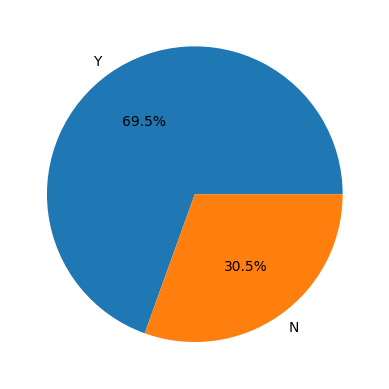

In [ ]:
temp = df['Loan_Status'].value_counts()
plt.pie(temp.values,
        labels=temp.index,
        autopct='%1.1f%%')
plt.show()

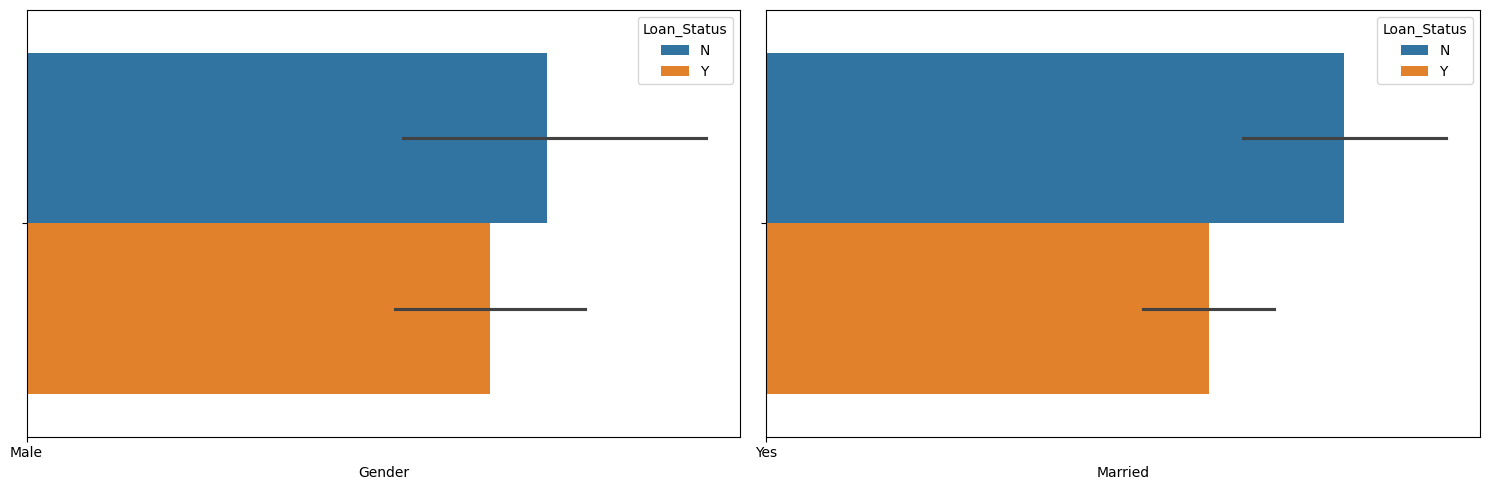

In [ ]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['Gender', 'Married']):
    plt.subplot(1, 2, i+1)
    sb.barplot(data=df, x=col, hue='Loan_Status')
plt.tight_layout()
plt.show()

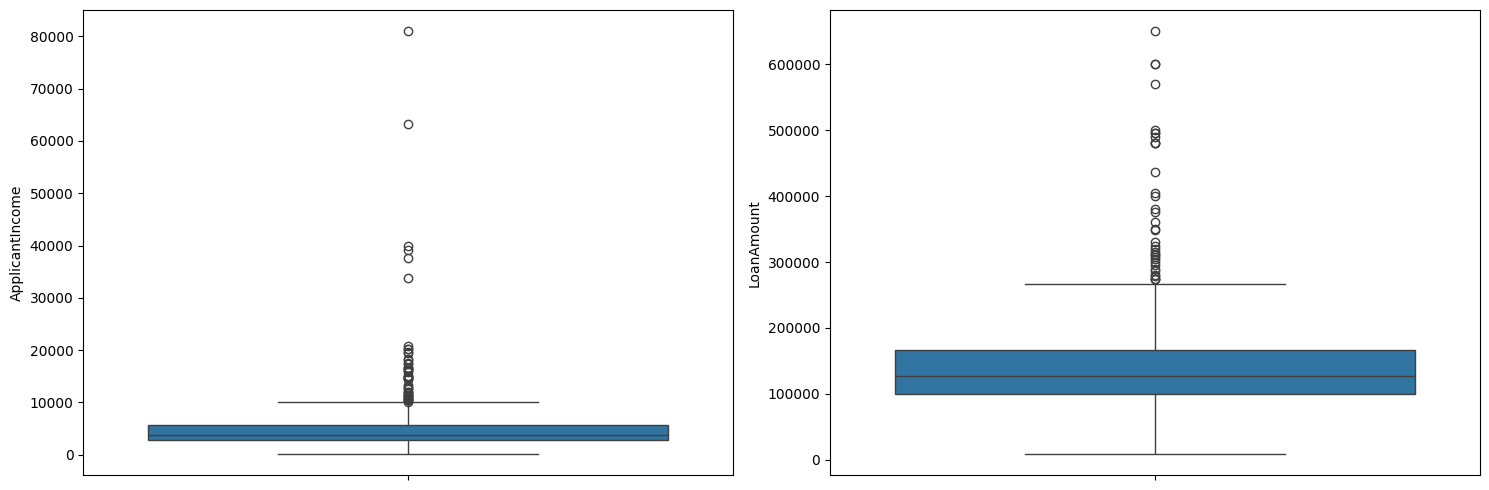

In [ ]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sb.boxplot(df[col])
plt.tight_layout()
plt.show()

In [ ]:
df = df[df['ApplicantIncome'] < 25000]
df = df[df['LoanAmount'] < 400000]

Mean amount of the loan granted to males as well as females by using groupby() method

In [ ]:
df.groupby('Gender').mean()['LoanAmount']

,LoanAmount
Gender,
0,116106.796117
1,133487.356322


In [ ]:
df.groupby(['Married', 'Gender']).mean()['LoanAmount']

Married  Gender
0        0         112189.189189
         1         121307.692308
1        0         126103.448276
         1         137968.553459
Name: LoanAmount, dtype: float64

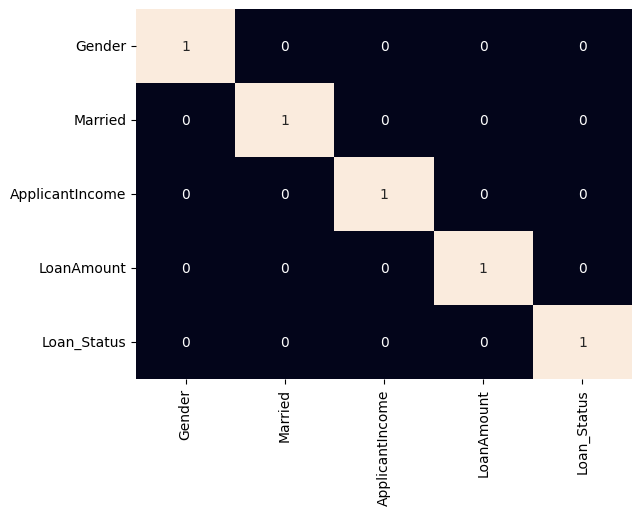

In [ ]:

# Function to apply label encoding
def encode_labels(data):
    for col in data.columns:
        if data[col].dtype == 'object':
            le = LabelEncoder()
            data[col] = le.fit_transform(data[col])

    return data

# Applying function in whole column
df = encode_labels(df)

# Generating Heatmap
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

Splitting the data for training and testing. After that, we will preprocess the training data

In [ ]:

features = df.drop('Loan_Status', axis=1)
target = df['Loan_Status'].values

X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.2,
                                      random_state=10)

# As the data was highly imbalanced we will balance
# it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)

X_train.shape, X.shape

((430, 4), (600, 4))

We use Standard scaling for normalizing the data.

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

We used Support Vector Classifier for training the model.

In [ ]:
from sklearn.metrics import roc_auc_score
model = SVC(kernel='rbf')
model.fit(X, Y)

print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
print()

Training Accuracy :  0.5966666666666667
Validation Accuracy :  0.40542763157894735



Model Evaluation is done using confusion matrix.

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
training_roc_auc = roc_auc_score(Y, model.predict(X))
validation_roc_auc = roc_auc_score(Y_val, model.predict(X_val))
print('Training ROC AUC Score:', training_roc_auc)
print('Validation ROC AUC Score:', validation_roc_auc)
print()
cm = confusion_matrix(Y_val, model.predict(X_val))

Training ROC AUC Score: 0.5966666666666667
Validation ROC AUC Score: 0.40542763157894735



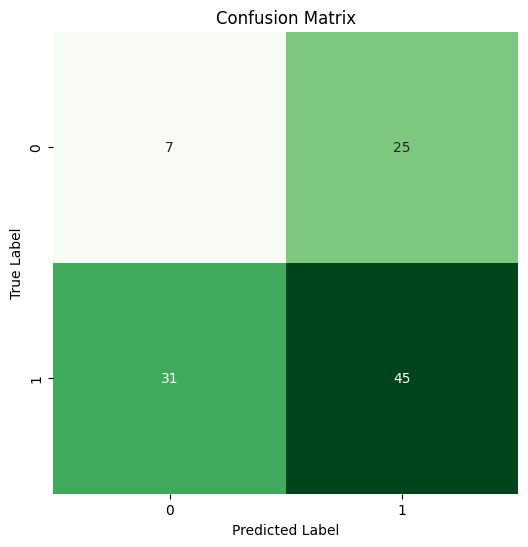

In [ ]:
plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_val, model.predict(X_val)))

              precision    recall  f1-score   support

           0       0.18      0.22      0.20        32
           1       0.64      0.59      0.62        76

    accuracy                           0.48       108
   macro avg       0.41      0.41      0.41       108
weighted avg       0.51      0.48      0.49       108

